## 7-8 Putting it all together with a multi class classification problem
* Binary classification have 2 options
* Multiclass classification have more then 2 options

### Data preperation

Imports

In [12]:
import torch as pt
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import helper_functions

Getting the data, then to tensors

In [13]:
# Set the hyperparamaters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# Create data
X_blob, y_blob = make_blobs(n_samples=1000, 
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# To tensors
X_blob = pt.from_numpy(X_blob).type(pt.float)
y_blob = pt.from_numpy(y_blob).type(pt.float)

# Split to train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)



In [14]:
y_blob, type(y_blob)

(tensor([3., 2., 2., 1., 1., 2., 1., 2., 2., 1., 1., 3., 0., 2., 2., 2., 0., 0.,
         0., 1., 1., 3., 3., 3., 1., 1., 0., 0., 2., 1., 2., 2., 2., 0., 0., 3.,
         2., 1., 3., 3., 1., 2., 1., 3., 1., 3., 0., 1., 3., 1., 2., 0., 1., 3.,
         0., 3., 0., 0., 0., 2., 2., 0., 2., 3., 1., 0., 2., 2., 1., 0., 3., 0.,
         1., 2., 1., 3., 1., 0., 1., 0., 2., 0., 0., 0., 1., 3., 2., 2., 0., 0.,
         0., 0., 1., 1., 3., 1., 3., 0., 1., 2., 1., 3., 3., 0., 3., 1., 1., 0.,
         2., 0., 3., 2., 1., 1., 1., 1., 2., 3., 2., 1., 0., 2., 3., 1., 3., 2.,
         1., 3., 2., 1., 0., 2., 1., 3., 1., 3., 0., 2., 1., 1., 0., 0., 3., 3.,
         3., 1., 1., 0., 0., 0., 0., 3., 2., 2., 0., 1., 0., 1., 1., 3., 2., 0.,
         1., 2., 0., 0., 1., 2., 3., 2., 1., 0., 0., 1., 0., 3., 2., 3., 2., 3.,
         1., 1., 0., 2., 0., 2., 1., 3., 0., 2., 1., 0., 1., 1., 0., 3., 2., 2.,
         2., 3., 0., 2., 1., 0., 1., 1., 2., 0., 1., 2., 2., 3., 2., 2., 1., 0.,
         2., 0., 3., 1., 3.,

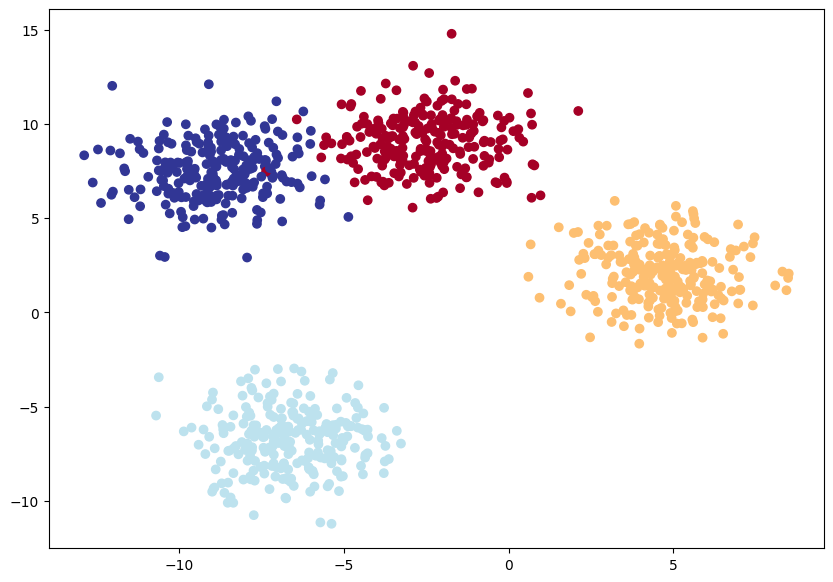

In [15]:
# Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)
plt.show()

### Build model

In [16]:
device = "cuda" if pt.cuda.is_available() else "cpu"
pt.manual_seed(42)
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )
    def forward(self, x):
        return self.linear_layer_stack(x)
# Create an instance of the model
model_4 = BlobModel(input_features=2, output_features=4).to(device)
print(model_4) # 2 pg av 2 dimensioner av blobbar, 4 för 4 st klasser

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)


In [17]:
# Create a loss function
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer
optimizer = pt.optim.SGD(params=model_4.parameters(), lr=0.1)

### Getting prediction probs to multi-class pytorch model 
När man använder multiclass classification ska man använda softmax istället för sigmoid, eftersom den konverterar till en där alla blir 1 och tar tanke på alla

In [18]:
# Getting prediction probabilities for a multi class PyTorch model
# Raw outputs
model_4.eval()
with pt.inference_mode():
    y_test_logits = model_4(X_blob_test.to(device))
    print(y_test_logits)
    y_pred_probs = pt.softmax(y_test_logits, dim=1)
    print(y_pred_probs[:10])
    print(pt.sum(y_pred_probs[0])) # sum av vald row blir 1

    print(pt.argmax(y_pred_probs[0]).item()) # för att finna den klassen som är mest sannolik att det är

tensor([[-7.6459e-01, -7.4120e-01, -1.5777e+00, -1.1376e+00],
        [-9.7256e-02, -9.4310e-01, -5.9631e-01, -1.3715e-01],
        [ 2.5277e-01, -2.3794e-01,  1.8817e-01, -6.5686e-03],
        [-4.1340e-01, -5.2042e-01, -9.3033e-01, -6.9626e-01],
        [-3.1184e-01, -1.3736e+00, -1.1991e+00, -3.8337e-01],
        [-1.4971e-01, -1.0617e+00, -7.1069e-01, -1.6452e-01],
        [ 1.5388e-01, -2.8874e-01,  1.5199e-01, -1.0874e-02],
        [-2.1543e-01, -1.1795e+00, -9.3000e-01, -2.7448e-01],
        [ 2.4432e-01, -2.4716e-01,  1.6492e-01,  6.1044e-03],
        [-2.3286e-01, -1.2120e+00, -9.8487e-01, -3.0037e-01],
        [-1.7742e-01, -1.1008e+00, -8.2928e-01, -2.3689e-01],
        [-9.4082e-01, -7.8985e-01, -1.8480e+00, -1.3347e+00],
        [-2.9723e-01, -1.3458e+00, -1.1543e+00, -3.6287e-01],
        [-2.9006e-01, -1.3393e+00, -1.1146e+00, -3.3518e-01],
        [-3.3713e-01, -1.4374e+00, -1.2379e+00, -3.8029e-01],
        [-1.0260e-01, -9.5066e-01, -6.1913e-01, -1.5105e-01],
        

In [19]:
# Convert our model's prediction probabilities to prediction labels
y_preds = pt.argmax(y_pred_probs, dim=1)
print(y_preds)

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])


### Train and Test Loop

In [20]:
y_blob_train.dtype

torch.float32

In [21]:
y_blob_train

tensor([1., 0., 2., 2., 0., 0., 0., 1., 3., 0., 0., 0., 3., 2., 3., 2., 1., 1.,
        3., 2., 2., 2., 3., 1., 3., 2., 3., 0., 1., 0., 0., 1., 1., 3., 0., 2.,
        2., 1., 1., 3., 1., 1., 2., 3., 3., 0., 0., 0., 1., 0., 0., 0., 2., 0.,
        1., 1., 0., 0., 2., 2., 3., 1., 0., 2., 1., 3., 2., 2., 2., 1., 0., 2.,
        3., 1., 1., 1., 2., 0., 0., 1., 2., 3., 1., 3., 3., 2., 3., 3., 2., 2.,
        1., 0., 0., 1., 2., 1., 3., 1., 2., 1., 3., 3., 3., 0., 2., 1., 2., 3.,
        1., 1., 2., 0., 3., 3., 2., 0., 2., 0., 3., 2., 0., 0., 2., 2., 0., 1.,
        2., 0., 3., 3., 2., 3., 2., 1., 3., 1., 1., 1., 1., 0., 0., 1., 0., 2.,
        3., 0., 0., 0., 0., 0., 1., 0., 3., 0., 0., 2., 2., 0., 0., 3., 0., 3.,
        3., 3., 0., 2., 0., 1., 2., 2., 2., 3., 0., 1., 1., 0., 1., 2., 0., 3.,
        2., 1., 3., 2., 3., 0., 3., 1., 1., 2., 2., 2., 2., 2., 2., 0., 3., 3.,
        2., 1., 1., 2., 3., 1., 0., 0., 1., 3., 0., 1., 3., 3., 2., 3., 3., 3.,
        1., 0., 0., 1., 0., 3., 2., 1., 

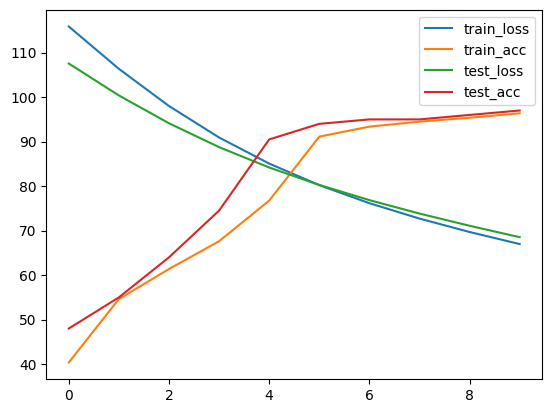

   train_loss  train_acc   test_loss  test_acc
0  115.882671     40.375  107.554221      48.0
1  106.361675     54.625  100.386250      55.0
2   98.012698     61.375   94.131678      64.0
3   90.937471     67.625   88.771552      74.5
4   85.075998     76.750   84.192842      90.5
5   80.225557     91.125   80.271792      94.0
6   76.171142     93.375   76.863557      95.0
7   72.714156     94.500   73.842162      95.0
8   69.696844     95.375   71.098638      96.0
9   66.986090     96.375   68.530107      97.0


In [22]:
### Create a training and testing loop for a multi-class pytorch model
from ml_funcs import progress_viewer 

pv = progress_viewer()

pt.manual_seed(42)
pt.cuda.manual_seed(42)

epochs = 10

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    model_4.train()

    train_logits = model_4(X_blob_train)
    train_pred_probs = pt.softmax(train_logits, dim=1)
    train_pred = train_pred_probs.argmax(dim=1)

    loss = loss_fn(train_logits, y_blob_train.type(pt.LongTensor))
    acc = helper_functions.accuracy_fn(y_blob_train, train_pred)
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_4.eval()
    with pt.inference_mode():
        test_logits = model_4(X_blob_test)
        test_pred = pt.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_blob_test.type(pt.LongTensor))
        test_acc = helper_functions.accuracy_fn(y_blob_test, test_pred)
    pv.add(loss.item(),acc,test_loss.item(), test_acc)
pv.show()
print(pv.df)
    

### Visualization

In [23]:
def view_results(X_train, y_train, X_test, y_test, model):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.title("Train")
    helper_functions.plot_decision_boundary(model, X_train, y_train)
    plt.subplot(1,2,2)
    plt.title("Test")
    helper_functions.plot_decision_boundary(model, X_test, y_test)

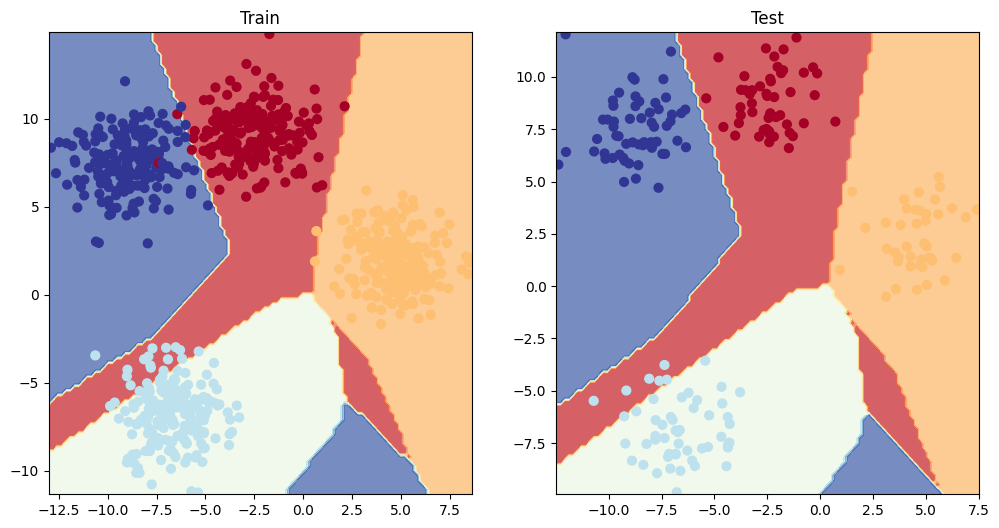

In [24]:
view_results(X_blob_train, y_blob_train, X_blob_test, y_blob_test, model_4)

### load and save

In [ ]:
# save
from ml_funcs import save_model
save_model(model_4)

In [ ]:

#! load, testa sen

from ml_funcs import load_model
loaded_model = load_model(BlobModel,args_arr=[2,4])
print(loaded_model.state_dict())



### Evalutate

In [ ]:
# Make predictions
model_4.eval()
with pt.inference_mode():
    y_logits = model_4(X_blob_test)
    y_preds = pt.argmax(pt.softmax(y_logits, dim=1), dim=1)
    print(y_preds)

### A few more classification metrics
* Accuracy - how meny precent went right, bad for unbalenced scenarios
* Precision # for unbalanced
* Recall # for unbalanced
* F1-score # combination of 2 above
* Confusion matrix
* Classification report

extra: https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

A lot of PyTorch metrics att TorchMetrics

In [ ]:
from torchmetrics import Accuracy

# Setup metric
tm_accuracy = Accuracy('multiclass', num_classes=4).to(device)
tm_accuracy(y_preds, y_blob_test).item()

### Exercises: 
https://www.learnpytorch.io/02_pytorch_classification/#exercises